<a href="https://colab.research.google.com/github/ahmedebeed555/deeplearning/blob/main/19SEP2025ImagesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import torch
from torch import nn
from torchvision import transforms
from torchvision import datasets

In [35]:
# import fashionMNIST
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

In [36]:
image.shape

torch.Size([1, 28, 28])

In [37]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [38]:
train_data.classes


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

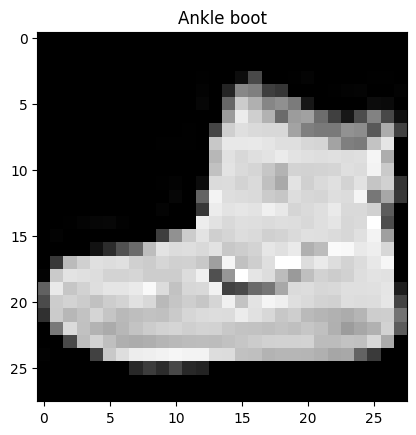

In [39]:
import matplotlib.pyplot as plt
image, label = train_data[00]
plt.imshow(image.squeeze(),cmap="gray")
plt.title(train_data.classes[label])
plt.show()

In [40]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)  # we shuffle data to make images shuffled to make it unbiased for each batch. we dont need to shuffle while test

test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)   # we shuffle data for train only not for test





In [41]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [45]:
# flatten model

flatten_model =  nn.Flatten()

X , label = train_data[0]
X = flatten_model(X)
X

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0

In [47]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self,X):
        return self.layer_stack(X)

In [49]:
model_0 = FashionMNISTModelV0(input_shape=784,hidden_units=10,output_shape=10)
model_0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [52]:
accuracy_fn = nn.CrossEntropyLoss()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [54]:
from timeit import default_timer as Timer
def print_train_time(start, end, device):
    total_time = end - start

    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


In [63]:
from tqdm.auto import tqdm
train_time_start_cpu = Timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")

    train_loss = 0

    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()      # put model in training mode

        # 1 . forward pass
        y_pred = model_0(X)

        # 2 . loss function

        loss = loss_fn(y_pred,y)

        train_loss += loss

        # 3 . zero grad

        optimizer.zero_grad()

        # 4. loss backward

        loss.backward()

        # 5 . optimizer

        optimizer.step()

        if batch % 400 == 0 :
          print(f"looked at {batch *len(X) } / {len(train_dataloader.dataset)}")



#train_loss/= len(train_dataloader)

test_loss, test_accuracy = 0, 0

model_0.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        test_pred = model_0(X)
        test_loss += loss_fn(test_pred, y)


#test_accuracy += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))     # note argmax returns index of MAX value  ( which is the propability of the predicted class )
test_accuracy += accuracy_fn(test_pred, y.argmax(dim=1))

test_loss /= len(test_dataloader)
test_accuracy /= len(test_dataloader)

print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test accuracy: {test_accuracy:.2f}")
train_time_end_cpu = Timer()

total_time_cpu = print_train_time(start=train_time_start_cpu, end=train_time_end_cpu, device="cpu")






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
looked at 0 / 60000
looked at 12800 / 60000
looked at 25600 / 60000
looked at 38400 / 60000
looked at 51200 / 60000
Epoch: 1
----------
looked at 0 / 60000
looked at 12800 / 60000
looked at 25600 / 60000
looked at 38400 / 60000
looked at 51200 / 60000
Epoch: 2
----------
looked at 0 / 60000
looked at 12800 / 60000
looked at 25600 / 60000
looked at 38400 / 60000
looked at 51200 / 60000


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [67]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_cpu = Timer()


epochs = 3

for epoch in tqdm(range(epochs)):
    print(f" Epoch {epoch} ")

    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. forward pass
        y_pred = model_0(X)

        # 2. loss function
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # Use item() to get the scalar value of the loss

        # 3. zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"looked at {batch * len(X)} / {len(train_dataloader.dataset)}")

    train_loss /= len(train_dataloader)

    test_loss, test_accuracy = 0, 0

    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)

            test_loss += loss_fn(test_pred, y).item() # Use item() here too

            # Calculate accuracy
            test_accuracy += (test_pred.argmax(dim=1) == y).sum().item()


    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader.dataset) # Divide by total number of samples in the test dataset


    print(f"Train Loss : {train_loss:.5f} | test_loss : {test_loss:.5f} , test_accuracy {test_accuracy:.2f} ")


train_time_end_cpu = Timer()
total_time = print_train_time(train_time_start_cpu, train_time_end_cpu, "cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

 Epoch 0 
looked at 0 / 60000
looked at 12800 / 60000
looked at 25600 / 60000
looked at 38400 / 60000
looked at 51200 / 60000
Train Loss : 0.40391 | test_loss : 0.45610 , test_accuracy 0.84 
 Epoch 1 
looked at 0 / 60000
looked at 12800 / 60000
looked at 25600 / 60000
looked at 38400 / 60000
looked at 51200 / 60000
Train Loss : 0.40475 | test_loss : 0.45637 , test_accuracy 0.84 
 Epoch 2 
looked at 0 / 60000
looked at 12800 / 60000
looked at 25600 / 60000
looked at 38400 / 60000
looked at 51200 / 60000
Train Loss : 0.40259 | test_loss : 0.46158 , test_accuracy 0.84 
Train time on cpu: 37.724 seconds
